In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("Modified_SQL_Dataset.csv")  # Replace with your dataset path


In [3]:

# Inspect the dataset
# Randomize the dataset
randomized_data = data.sample(frac=1, random_state=42)  # Use a fixed random_state for reproducibility

# Display the last few rows of the randomized dataset
randomized_data.tail(10)

,Query,Label
6265,1' where 4880 = 4880 and ( select 2* ( ...,1
22118,"SELECT contrastID AS ID, silent AS fierce FR...",0
11284,"-1504"" ) as wpes where 6256 = 6256 union ...",1
11964,minas de riotinto,0
21575,DELETE FROM fewer,0
29802,"SELECT column_name ( s ) FROM suggest,had",0
5390,1' ) and 4380 = 5851 and ( 'cxcl' = ...,1
860,"select * from users where id = 1 or 1#""{ un...",1
15795,baxley@italianmotorvillagesevilla.sh,0
23654,SELECT * FROM lungs WHERE advice = 'egg' LIMIT 3,0


In [4]:
# Display basic information about the dataset
data.info()

# Count the distribution of labels in the "Label" column
label_counts = data['Label'].value_counts()

# Print the label counts
print("Label Distribution:")
print(label_counts)

# Optionally, calculate the percentage distribution of labels
label_percentage = data['Label'].value_counts(normalize=True) * 100
print("\nLabel Percentage Distribution:")
print(label_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB
Label Distribution:
Label
0    19537
1    11382
Name: count, dtype: int64

Label Percentage Distribution:
Label
0    63.187684
1    36.812316
Name: proportion, dtype: float64


In [5]:
!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load the Kaggle Dataset
# Update the file path if you're running locally
data = pd.read_csv("Modified_SQL_Dataset.csv")  # Replace with your dataset path

# Inspect the dataset
print(data.head())

# Ensure columns match: "Sentence" for queries and "Label" for binary classification
X = data["Query"]  # SQL queries
y = data["Label"]      # 0 = benign, 1 = malicious

# Step 2: Preprocess Data
# Tokenize the text (convert queries to integer indices)
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # Set a maximum sequence length
X_padded = pad_sequences(X_tokenized, maxlen=max_sequence_length, padding='post')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 3: Build the CNN Model
model = Sequential([
   Embedding(input_dim=10000, output_dim=128),
  # Embedding layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.5),  # Dropout for regularization
    Flatten(),  # Flatten the feature maps
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Test on New Inputs
new_queries = ["SELECT * FROM users WHERE username='admin' AND password='123'",
               "' OR 1=1 --",
               "DROP TABLE users; --",
               "Safe query with no injection"]
new_queries_tokenized = tokenizer.texts_to_sequences(new_queries)
new_queries_padded = pad_sequences(new_queries_tokenized, maxlen=max_sequence_length, padding='post')

predictions = model.predict(new_queries_padded)
for query, pred in zip(new_queries, predictions):
    print(f"Query: {query}")
    print("SQL Injection Detected!" if pred > 0.5 else "Query is Safe.")
    print("-" * 50)


                                               Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
Epoch 1/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9001 - loss: 0.2146 - val_accuracy: 0.9949 - val_loss: 0.0265
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9956 - loss: 0.0230 - val_accuracy: 0.9960 - val_loss: 0.0193
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9966 - loss: 0.0197 - val_accuracy: 0.9962 - val_loss: 0.0194
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9978 - loss: 0.0135 - val_accuracy: 0.9951 - val_loss: 0.0298
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9976 - loss: 0.0167 - val_accuracy: 0.9954 - val_los

In [7]:
import pickle
from tensorflow.keras.models import save_model

# Save the model in the new Keras format
model.save('sql_injection_cnn.keras')

# Save the tokenizer and metadata
with open('sql_tokenizer.pkl', 'wb') as f:
    pickle.dump({
        'tokenizer': tokenizer,
        'max_sequence_length': max_sequence_length,
        'vocab_size': 10000
    }, f)

print("Model saved to sql_injection_cnn.keras")
print("Tokenizer saved to sql_tokenizer.pkl")


Model saved to sql_injection_cnn.keras
Tokenizer saved to sql_tokenizer.pkl


In [8]:
safe_queries = [
    "SELECT * FROM users WHERE username='john' AND password='doe123'",
    "SELECT id, name FROM students WHERE class='10A'",
    "UPDATE users SET password='newpass' WHERE user_id=1",
    "INSERT INTO orders (user_id, item_id, quantity) VALUES (1, 2, 3)",
    "DELETE FROM products WHERE product_id=100",
    "SELECT * FROM employees WHERE department='HR'",
    "SELECT COUNT(*) FROM login_logs WHERE date='2023-12-25'",
    "SELECT * FROM articles WHERE published=1 ORDER BY date DESC",
    "SELECT name FROM users WHERE email='test@example.com'",
    "INSERT INTO feedback (user_id, message) VALUES (5, 'Great product!')",
    "UPDATE accounts SET status='active' WHERE last_login > '2024-01-01'",
    "SELECT price FROM products WHERE product_name='Laptop'",
    "DELETE FROM sessions WHERE session_expires < NOW()",
    "SELECT AVG(score) FROM results WHERE subject='Math'",
    "SELECT * FROM blog_posts WHERE category='Tech' AND published=1"
]
malicious_queries = [
    "' OR 1=1 --",
    "' OR '1'='1",
    "admin' --",
    "' UNION SELECT NULL, NULL, NULL --",
    "'; DROP TABLE users; --",
    "' OR '' = '",
    "1' OR '1' = '1'; --",
    "' OR 1=1#",
    "' OR 1=1/*",
    "admin' #",
    "' OR EXISTS(SELECT * FROM users) --",
    "' OR SLEEP(5) --",
    "' AND 1=2 UNION SELECT null, username, password FROM users --",
    "' OR 1=1 LIMIT 1 OFFSET 1 --",
    "' OR ''=''; DROP TABLE students; --"
]



In [9]:
test_queries = malicious_queries + safe_queries
test_tokenized = tokenizer.texts_to_sequences(test_queries)
test_padded = pad_sequences(test_tokenized, maxlen=max_sequence_length, padding='post')

predictions = model.predict(test_padded)

for query, pred in zip(test_queries, predictions):
    print(f"Query: {query}")
    print("SQL Injection Detected!" if pred > 0.5 else "Query is Safe.")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Query: ' OR 1=1 --
SQL Injection Detected!
--------------------------------------------------
Query: ' OR '1'='1
SQL Injection Detected!
--------------------------------------------------
Query: admin' --
SQL Injection Detected!
--------------------------------------------------
Query: ' UNION SELECT NULL, NULL, NULL --
SQL Injection Detected!
--------------------------------------------------
Query: '; DROP TABLE users; --
SQL Injection Detected!
--------------------------------------------------
Query: ' OR '' = '
SQL Injection Detected!
--------------------------------------------------
Query: 1' OR '1' = '1'; --
SQL Injection Detected!
--------------------------------------------------
Query: ' OR 1=1#
SQL Injection Detected!
--------------------------------------------------
Query: ' OR 1=1/*
SQL Injection Detected!
--------------------------------------------------
Query: admin' #
SQL Injection Detected!
--------------------------------------

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import pickle

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("scikit-learn version:", sklearn.__version__)


pandas version: 2.2.2
numpy version: 1.26.4
tensorflow version: 2.19.0
scikit-learn version: 1.5.1


                                               Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
Epoch 1/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9122 - loss: 0.1986 - val_accuracy: 0.9956 - val_loss: 0.0213
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9964 - loss: 0.0209 - val_accuracy: 0.9954 - val_loss: 0.0208
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9963 - loss: 0.0208 - val_accuracy: 0.9943 - val_loss: 0.0257
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9970 - loss: 0.0150 - val_accuracy: 0.9954 - val_loss: 0.0196
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9974 - loss: 0.0161 - val_accuracy: 0.9962 - val_los

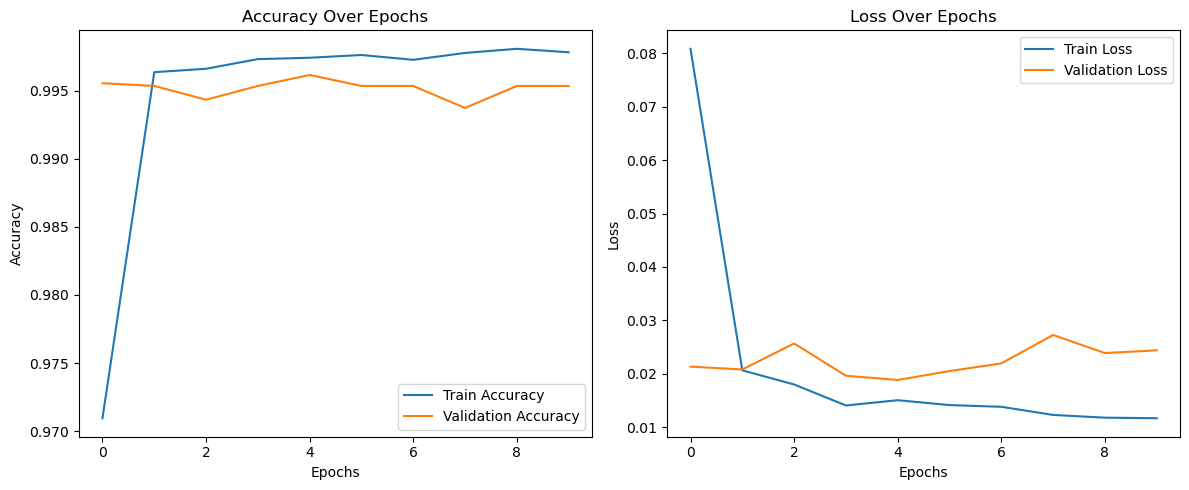

You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure saved as 'model_structure.png'.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 98, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,516,421 (17.23 MB)

 Trainable params: 1,505,473 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,010,948 (11.49 MB)

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Step 1: Load the Kaggle Dataset
data = pd.read_csv("Modified_SQL_Dataset.csv")  # Replace with your dataset path

# Inspect the dataset
print(data.head())

# Ensure columns match: "Sentence" for queries and "Label" for binary classification
X = data["Query"]  # SQL queries
y = data["Label"]  # 0 = benign, 1 = malicious

# Step 2: Preprocess Data
# Tokenize the text (convert queries to integer indices)
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # Set a maximum sequence length
X_padded = pad_sequences(X_tokenized, maxlen=max_sequence_length, padding='post')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 3: Build the CNN Model
model = Sequential([
   Embedding(input_dim=10000, output_dim=128),  # Embedding layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.5),  # Dropout for regularization
    Flatten(),  # Flatten the feature maps
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Step 5: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report with precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Step 6: Training Plots
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Model Structure Picture
# Save and display the model architecture as an image
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
print("Model structure saved as 'model_structure.png'.")

# Step 8: Model Summary
# Print the model summary
model.summary()

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import os

# -------------------------------
# Step 1: Load Dataset
data = pd.read_csv("Modified_SQL_Dataset.csv")
X = data["Query"]
y = data["Label"]

# -------------------------------
# Step 2: Train/Test Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 3: Feature Preparation

# 3.1 TF-IDF Vectorizer for RF and SVM
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)

# 3.2 Tokenizer for CNN and LSTM
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_raw)
X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# -------------------------------
# Step 4: Train Models

# 4.1 Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))

# 4.2 SVM
print("Training SVM...")
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# 4.3 CNN Model
print("Training CNN...")
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # Embedding layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
cnn_pred = (cnn_model.predict(X_test_padded) > 0.5).astype("int32").flatten()
print("CNN Accuracy:", accuracy_score(y_test, cnn_pred))

# 4.4 LSTM Model
print("Training LSTM...")
lstm_model = Sequential([
 Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
lstm_pred = (lstm_model.predict(X_test_padded) > 0.5).astype("int32").flatten()
print("LSTM Accuracy:", accuracy_score(y_test, lstm_pred))

# -------------------------------
# Step 5: Ensemble Majority Voting
print("\nEnsembling with Majority Voting...")
ensemble_pred = []
for i in range(len(y_test)):
    votes = [rf_pred[i], svm_pred[i], cnn_pred[i], lstm_pred[i]]
    majority_vote = np.bincount(votes).argmax()
    ensemble_pred.append(majority_vote)

print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred, target_names=['Safe', 'Injection']))

# -------------------------------
# Step 6: Save Models and Tokenizers
os.makedirs("models", exist_ok=True)

pickle.dump(rf_model, open("models/rf_model.pkl", "wb"))
pickle.dump(svm_model, open("models/svm_model.pkl", "wb"))
pickle.dump(tfidf_vectorizer, open("models/tfidf_vectorizer.pkl", "wb"))
pickle.dump(tokenizer, open("models/tokenizer.pkl", "wb"))

cnn_model.save("models/cnn_model.keras")
lstm_model.save("models/lstm_model.keras")

# -------------------------------
# Step 7: Prediction Class for Reuse

class SQLInjectionDetector:
    def __init__(self):
        self.rf = pickle.load(open("models/rf_model.pkl", "rb"))
        self.svm = pickle.load(open("models/svm_model.pkl", "rb"))
        self.tfidf = pickle.load(open("models/tfidf_vectorizer.pkl", "rb"))
        self.tokenizer = pickle.load(open("models/tokenizer.pkl", "rb"))
        self.cnn = tf.keras.models.load_model("models/cnn_model.keras")
        self.lstm = tf.keras.models.load_model("models/lstm_model.keras")
        self.max_len = max_sequence_length

    @tf.function
    def cnn_predict(self, x):
        return self.cnn(x, training=False)

    @tf.function
    def lstm_predict(self, x):
        return self.lstm(x, training=False)

    def predict(self, query):
        # Vectorize with TF-IDF
        tfidf_vec = self.tfidf.transform([query])
        rf_pred = self.rf.predict(tfidf_vec)[0]
        svm_pred = self.svm.predict(tfidf_vec)[0]

        # Tokenize + Pad for NN models
        seq = self.tokenizer.texts_to_sequences([query])
        pad = pad_sequences(seq, maxlen=self.max_len, padding='post')
        pad_tensor = tf.convert_to_tensor(pad)

        cnn_pred_prob = self.cnn_predict(pad_tensor).numpy()[0][0]
        lstm_pred_prob = self.lstm_predict(pad_tensor).numpy()[0][0]

        cnn_pred = int(cnn_pred_prob > 0.5)
        lstm_pred = int(lstm_pred_prob > 0.5)

        votes = [rf_pred, svm_pred, cnn_pred, lstm_pred]
        majority_vote = np.bincount(votes).argmax()

        return {
            "query": query,
            "votes": {
                "rf": rf_pred,
                "svm": svm_pred,
                "cnn": cnn_pred,
                "lstm": lstm_pred,
            },
            "probabilities": {
                "cnn_prob": cnn_pred_prob,
                "lstm_prob": lstm_pred_prob
            },
            "ensemble_prediction": majority_vote,
            "is_malicious": bool(majority_vote)
        }

# -------------------------------
# Step 8: Demo Testing

detector = SQLInjectionDetector()

test_queries = [
    "SELECT * FROM users WHERE username='admin' AND password='123'",
    "' OR 1=1 --",
    "DROP TABLE users; --",
    "Safe query with no injection",
    "SELECT first_name, last_name FROM customers WHERE region='North'",
    "UNION SELECT username, password FROM users--"
]

print("\nTesting Queries:\n")
for q in test_queries:
    result = detector.predict(q)
    print(f"Query: {q}")
    print(f"Votes: {result['votes']}")
    print(f"NN Probabilities: {result['probabilities']}")
    print("Result:", "SQL Injection Detected!" if result["is_malicious"] else "Query is Safe.")
    print("-" * 50)


Training Random Forest...
RF Accuracy: 0.9953104786545925
Training SVM...
SVM Accuracy: 0.9941785252263907
Training CNN...
Epoch 1/5
619/619 - 18s - 30ms/step - accuracy: 0.9672 - loss: 0.0932 - val_accuracy: 0.9947 - val_loss: 0.0287
Epoch 2/5
619/619 - 15s - 24ms/step - accuracy: 0.9946 - loss: 0.0260 - val_accuracy: 0.9947 - val_loss: 0.0232
Epoch 3/5
619/619 - 15s - 25ms/step - accuracy: 0.9964 - loss: 0.0219 - val_accuracy: 0.9925 - val_loss: 0.0334
Epoch 4/5
619/619 - 15s - 24ms/step - accuracy: 0.9969 - loss: 0.0171 - val_accuracy: 0.9941 - val_loss: 0.0276
Epoch 5/5
619/619 - 15s - 24ms/step - accuracy: 0.9974 - loss: 0.0152 - val_accuracy: 0.9929 - val_loss: 0.0315
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
CNN Accuracy: 0.9936934023285899
Training LSTM...
Epoch 1/5
619/619 - 78s - 126ms/step - accuracy: 0.9767 - loss: 0.0693 - val_accuracy: 0.9949 - val_loss: 0.0218
Epoch 2/5
619/619 - 67s - 109ms/step - accuracy: 0.9962 - loss: 0.0214 - val_accuracy: 0.9941 - val_loss: 0.0221


Training Random Forest...
RF Accuracy: 0.9953104786545925
Training SVM...
SVM Accuracy: 0.9941785252263907
Training CNN...
Epoch 1/5
619/619 - 19s - 31ms/step - accuracy: 0.9614 - loss: 0.0985 - val_accuracy: 0.9947 - val_loss: 0.0242
Epoch 2/5
619/619 - 14s - 23ms/step - accuracy: 0.9947 - loss: 0.0265 - val_accuracy: 0.9929 - val_loss: 0.0245
Epoch 3/5
619/619 - 13s - 22ms/step - accuracy: 0.9961 - loss: 0.0178 - val_accuracy: 0.9927 - val_loss: 0.0267
Epoch 4/5
619/619 - 15s - 25ms/step - accuracy: 0.9964 - loss: 0.0169 - val_accuracy: 0.9927 - val_loss: 0.0310
Epoch 5/5
619/619 - 16s - 25ms/step - accuracy: 0.9970 - loss: 0.0150 - val_accuracy: 0.9923 - val_loss: 0.0356
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
CNN Accuracy: 0.9946636481241915
Training LSTM...
Epoch 1/5
619/619 - 80s - 129ms/step - accuracy: 0.9780 - loss: 0.0696 - val_accuracy: 0.9958 - val_loss: 0.0231
Epoch 2/5
619/619 - 66s - 106ms/step - accuracy: 0.9958 - loss: 0.0228 - val_accuracy: 0.9947 - val_loss: 0.0222


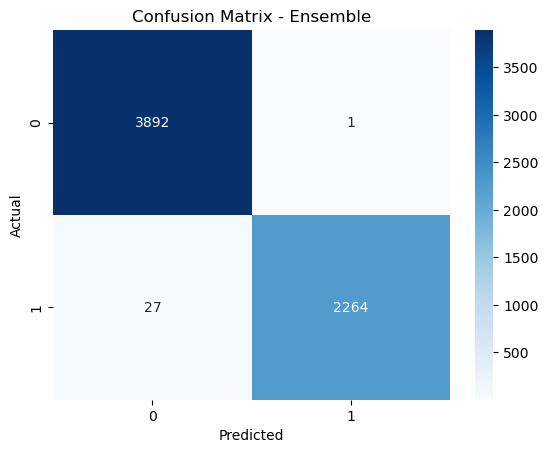


Testing Queries:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Query: SELECT * FROM users WHERE username='admin' AND password='123'
Votes: {'rf': 0, 'svm': 1, 'cnn': 1, 'lstm': 1}
Result: SQL Injection Detected!
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Query: ' OR 1=1 --
Votes: {'rf': 1, 'svm': 1, 'cnn': 1, 'lstm': 1}
Result: SQL Injection Detected!
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Query: DROP TABLE users; --
Votes: {'rf': 0, 'svm': 0, 'cnn': 0, 'lstm': 1}
Result: Query is Safe.
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Query: Safe query with no injection
Votes: {'rf': 0, 'svm': 0, 'cnn': 0, 'lstm': 0}
Result: Query is Safe.
--------------------------------------------------
1/1 ━━━━━━━━━━━━━

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Config
max_sequence_length = 100
weights = {"rf": 1.0, "svm": 1.0, "cnn": 1.5, "lstm": 1.5}  # for weighted voting

# Step 1: Load Dataset
data = pd.read_csv("Modified_SQL_Dataset.csv")
X = data["Query"]
y = data["Label"]

# Step 2: Train/Test Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Preparation
# 3.1 TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)

# 3.2 Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_raw)
X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Step 4: Train Models
# 4.1 Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))

# 4.2 SVM
print("Training SVM...")
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# 4.3 CNN
print("Training CNN...")
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.5),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
cnn_pred = (cnn_model.predict(X_test_padded) > 0.5).astype("int32").flatten()
print("CNN Accuracy:", accuracy_score(y_test, cnn_pred))

# 4.4 LSTM
print("Training LSTM...")
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
lstm_pred = (lstm_model.predict(X_test_padded) > 0.5).astype("int32").flatten()
print("LSTM Accuracy:", accuracy_score(y_test, lstm_pred))

# Step 5: Ensemble Voting
print("\nEnsembling with Majority Voting...")
ensemble_pred = []
for i in range(len(y_test)):
    votes = [rf_pred[i], svm_pred[i], cnn_pred[i], lstm_pred[i]]
    ensemble_pred.append(np.bincount(votes).argmax())

print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, ensemble_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Save Models
os.makedirs("models", exist_ok=True)
pickle.dump(rf_model, open("models/rf_model.pkl", "wb"))
pickle.dump(svm_model, open("models/svm_model.pkl", "wb"))
pickle.dump(tfidf_vectorizer, open("models/tfidf_vectorizer.pkl", "wb"))
pickle.dump(tokenizer, open("models/tokenizer.pkl", "wb"))
cnn_model.save("models/cnn_model.keras")
lstm_model.save("models/lstm_model.keras")

# Step 7: Load Models Once
rf_loaded = pickle.load(open("models/rf_model.pkl", "rb"))
svm_loaded = pickle.load(open("models/svm_model.pkl", "rb"))
tfidf_loaded = pickle.load(open("models/tfidf_vectorizer.pkl", "rb"))
tokenizer_loaded = pickle.load(open("models/tokenizer.pkl", "rb"))
cnn_loaded = tf.keras.models.load_model("models/cnn_model.keras")
lstm_loaded = tf.keras.models.load_model("models/lstm_model.keras")

# Step 8: Prediction Function
def predict_sql_injection(query, weighted=False):
    tfidf_vec = tfidf_loaded.transform([query])
    rf_pred = int(rf_loaded.predict(tfidf_vec)[0])
    svm_pred = int(svm_loaded.predict(tfidf_vec)[0])

    seq = tokenizer_loaded.texts_to_sequences([query])
    pad = pad_sequences(seq, maxlen=max_sequence_length, padding='post')
    cnn_pred = int((cnn_loaded.predict(pad) > 0.5)[0][0])
    lstm_pred = int((lstm_loaded.predict(pad) > 0.5)[0][0])

    votes = {"rf": rf_pred, "svm": svm_pred, "cnn": cnn_pred, "lstm": lstm_pred}

    if weighted:
        result = {}
        for model, vote in votes.items():
            result[vote] = result.get(vote, 0) + weights[model]
        majority = max(result, key=result.get)
    else:
        majority = np.bincount(list(votes.values())).argmax()

    return {
        "query": query,
        "votes": votes,
        "ensemble_prediction": majority,
        "is_malicious": bool(majority)
    }

# Step 9: Demo Predictions
test_queries = [
    "SELECT * FROM users WHERE username='admin' AND password='123'",
    "' OR 1=1 --",
    "DROP TABLE users; --",
    "Safe query with no injection",
    "SELECT first_name, last_name FROM customers WHERE region='North'",
    "UNION SELECT username, password FROM users--"
]

print("\nTesting Queries:\n")
for q in test_queries:
    result = predict_sql_injection(q, weighted=True)  # Toggle weighted voting
    print(f"Query: {q}")
    print(f"Votes: {result['votes']}")
    print("Result:", "SQL Injection Detected!" if result["is_malicious"] else "Query is Safe.")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Random Forest Metrics:
Accuracy: 0.9953
Precision: 0.9991
Recall: 0.9882
F1-Score: 0.9936

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           1.00      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       1.00      1.00      1.00      6184


SVM Metrics:
Accuracy: 0.9942
Precision: 0.9996
Recall: 0.9847
F1-Score: 0.9921

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.98      0.99      2291

    accuracy                           0.99      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       0.99      0.99      0.99      6184


CNN Metrics:
Accuracy: 0.9947

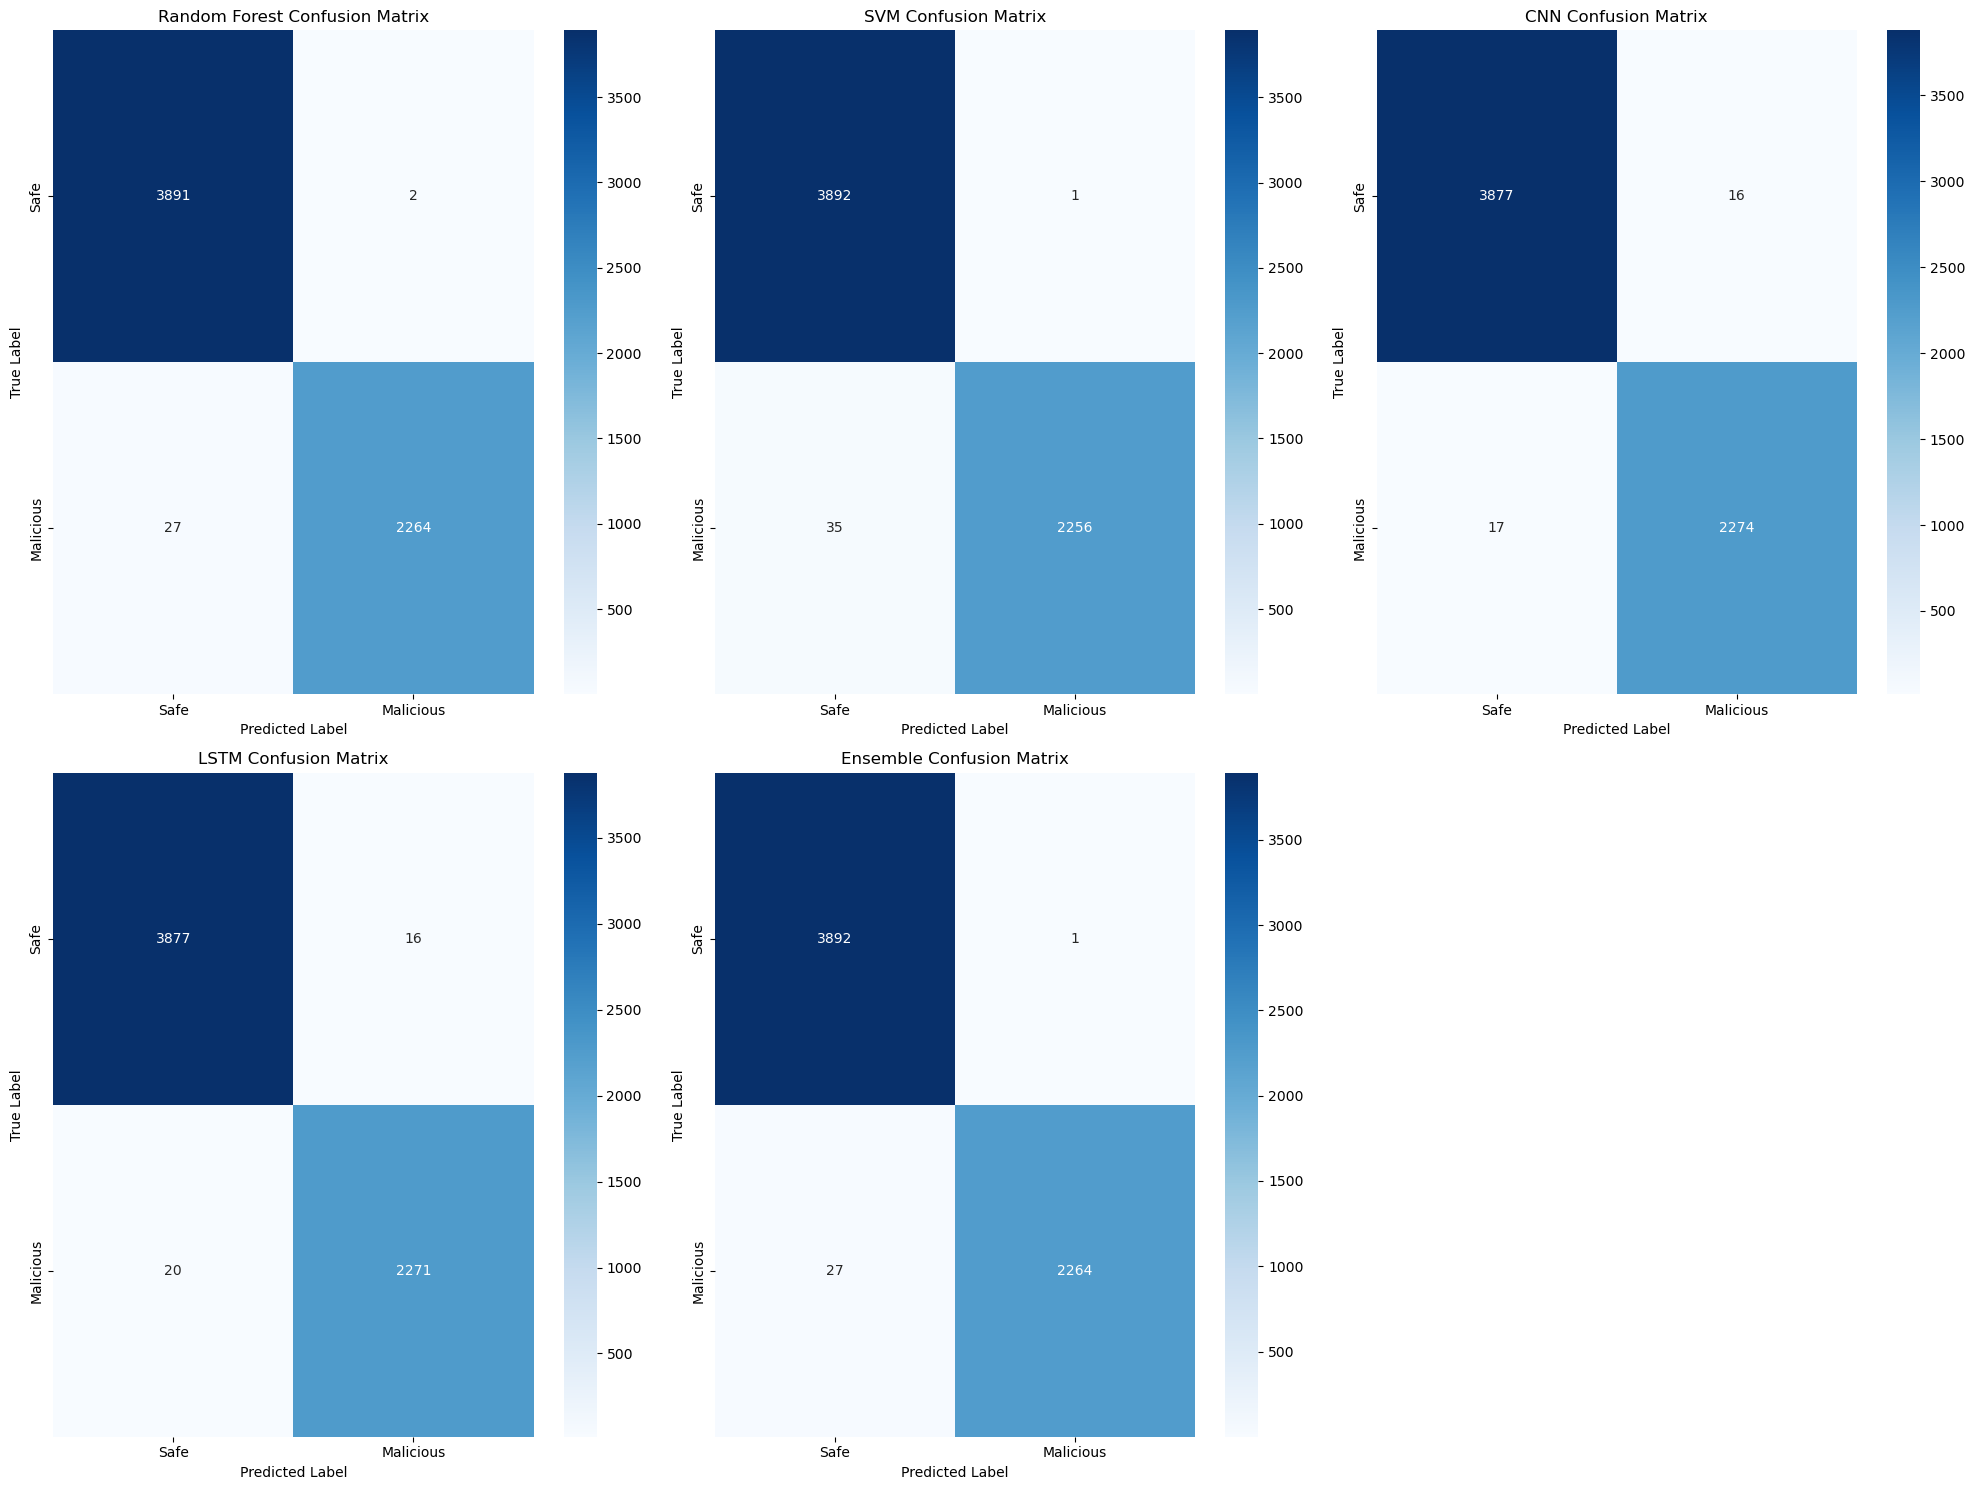

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step


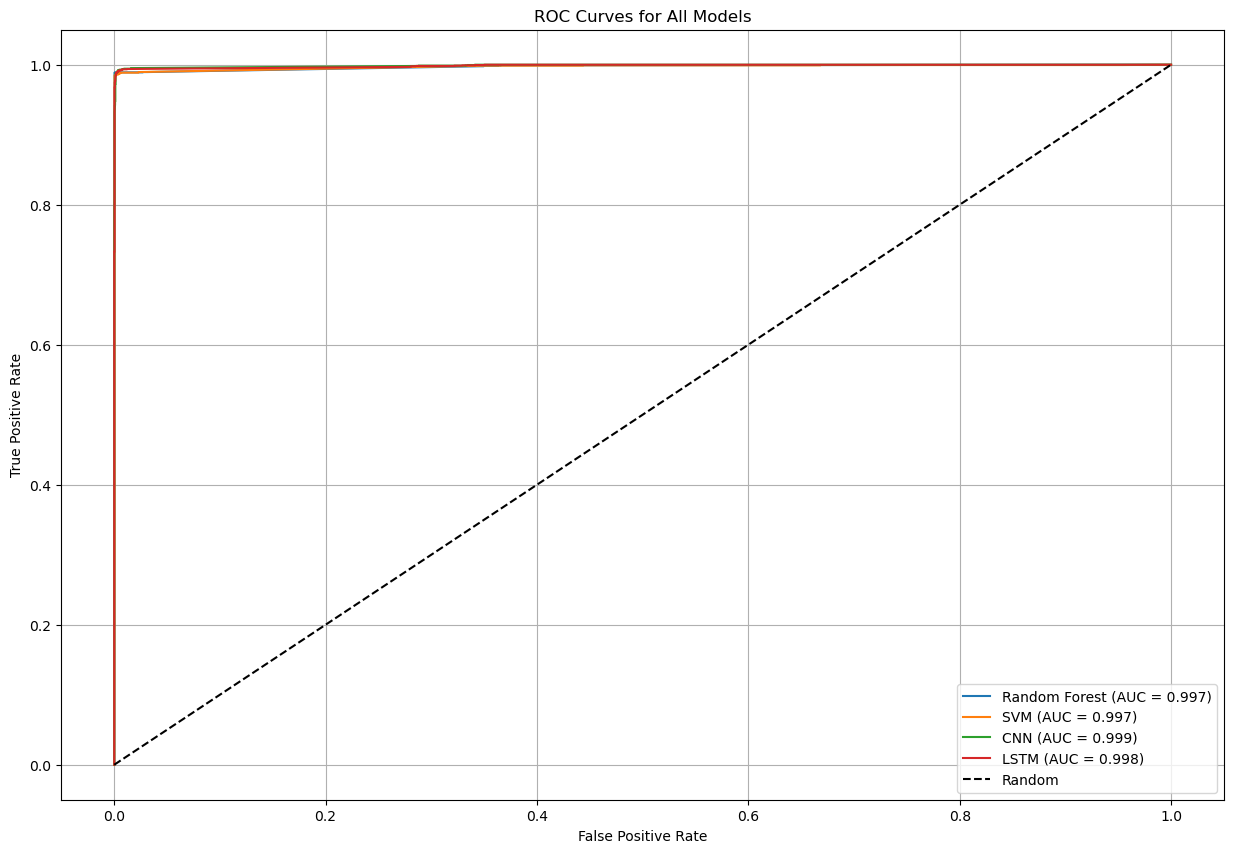

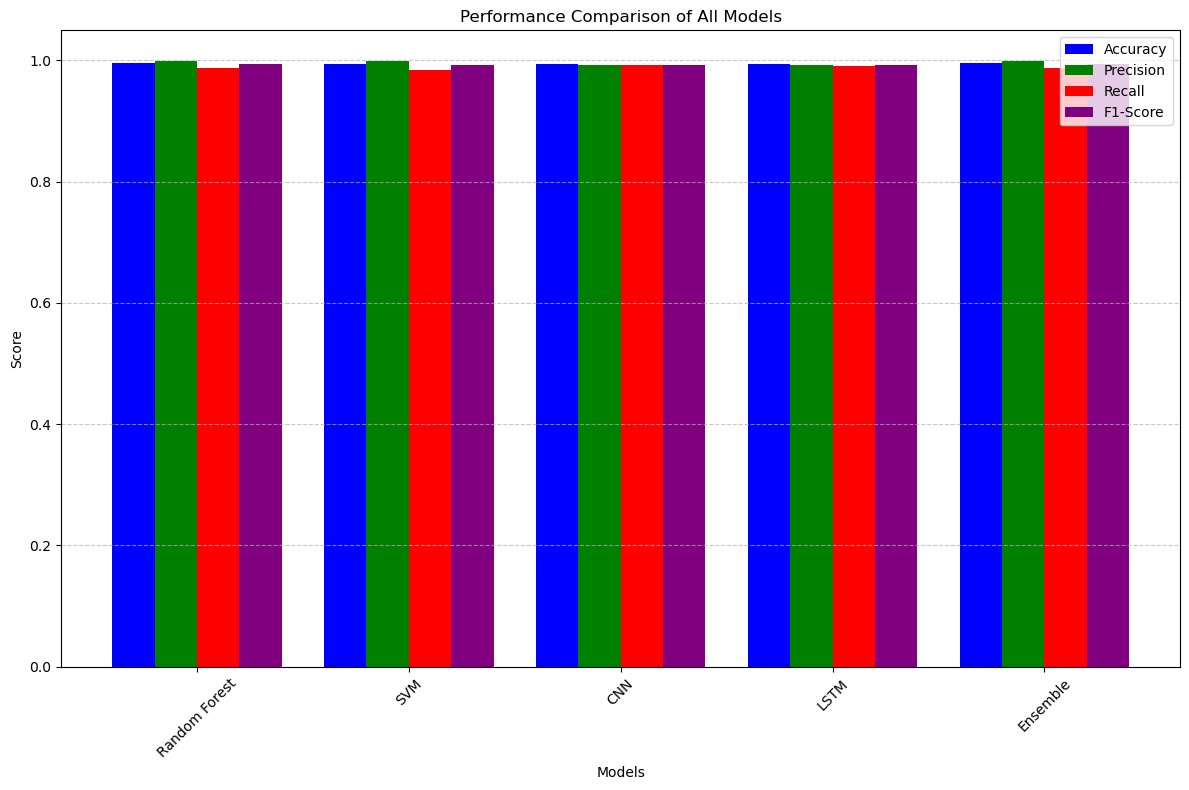

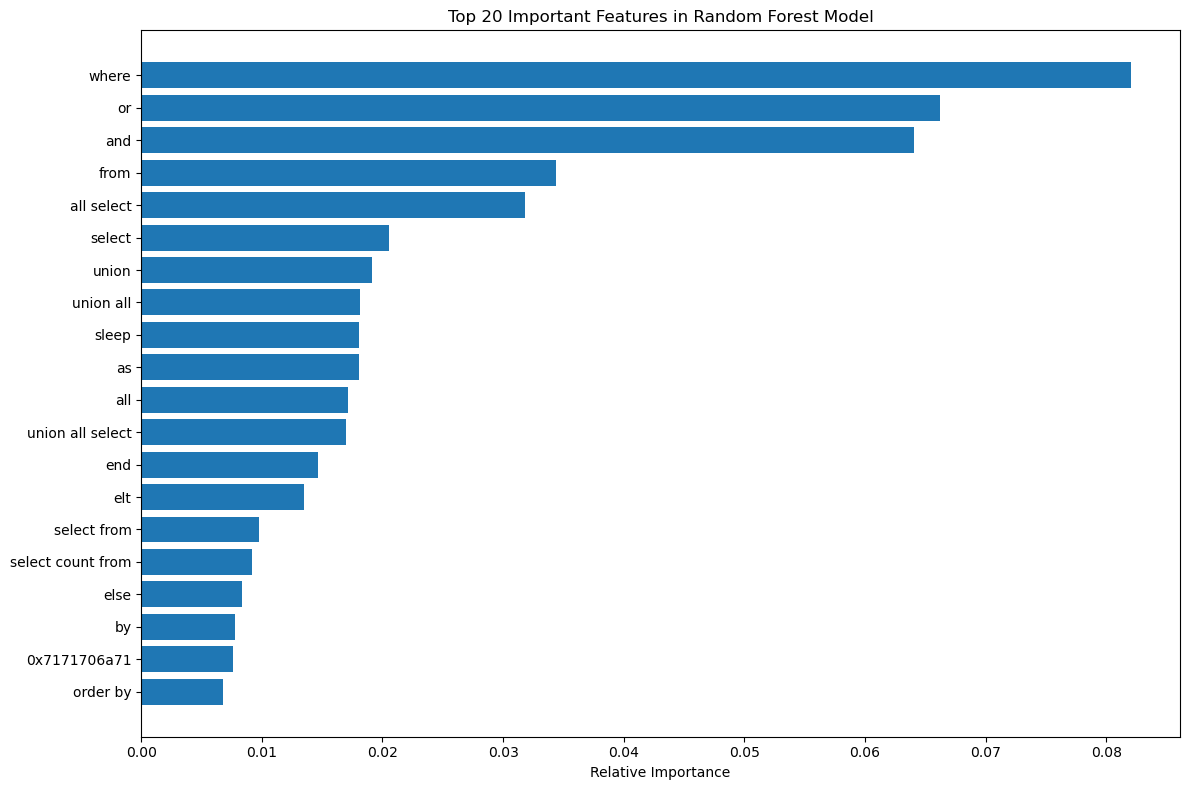

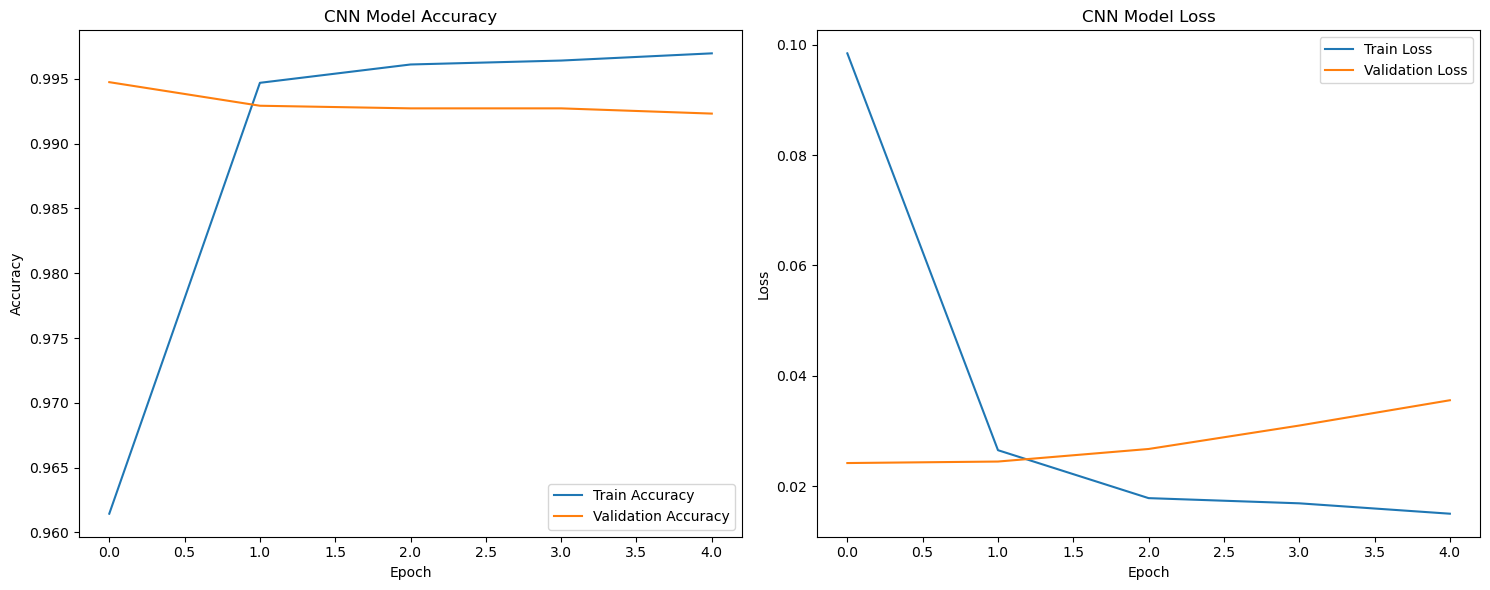

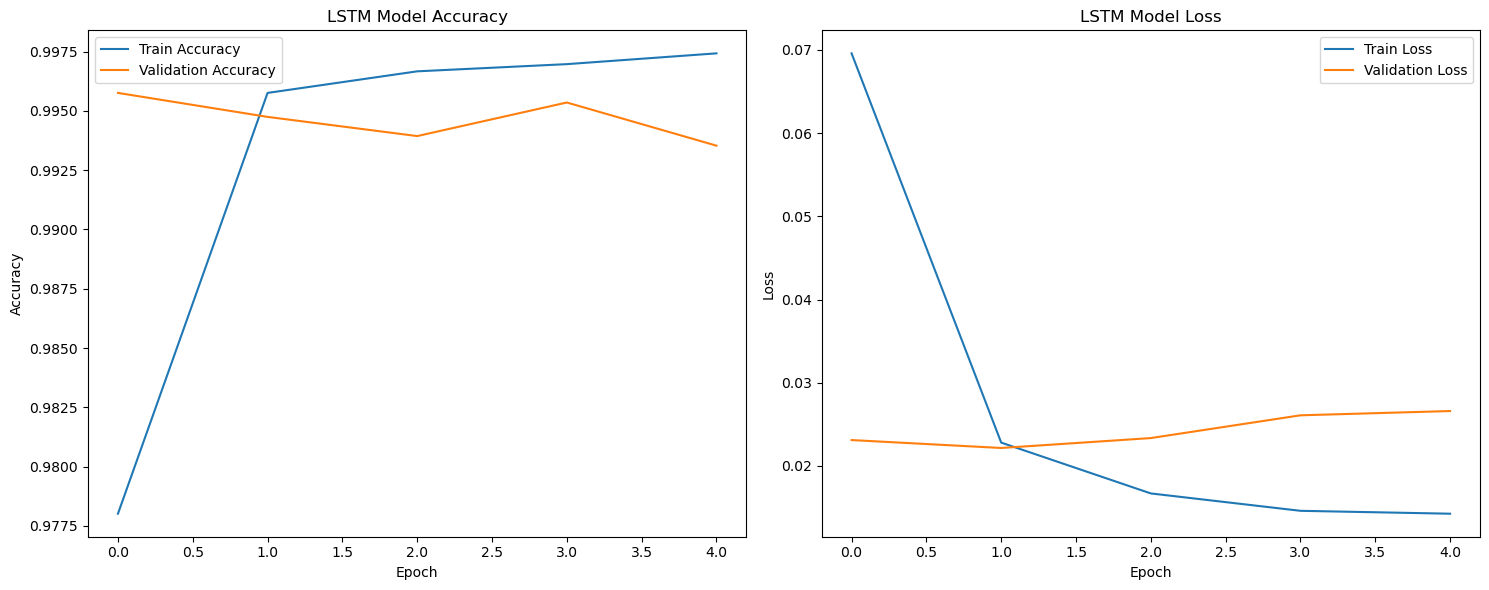

You must install pydot (`pip install pydot`) for `plot_model` to work.
CNN model structure saved as 'cnn_model_structure.png'
You must install pydot (`pip install pydot`) for `plot_model` to work.
LSTM model structure saved as 'lstm_model_structure.png'


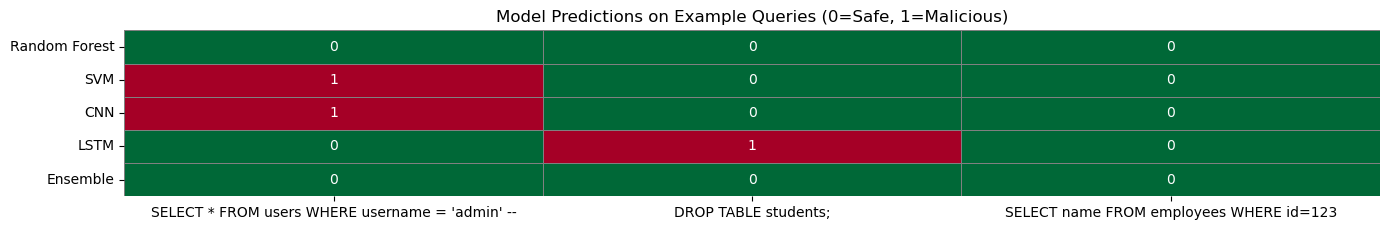

All visualizations completed and saved as PNG files.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score,
                             classification_report, confusion_matrix, roc_curve, auc)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Assume the following are already loaded/defined from your training pipeline ---

# Models:
# rf_model, svm_model, cnn_model, lstm_model
# Ensemble predictions: ensemble_pred (numpy array)
# Test data:
# X_test_tfidf (for RF and SVM), X_test_padded (for CNN, LSTM), y_test (true labels)
# Tokenizer used in preprocessing text data:
# tokenizer
# TF-IDF Vectorizer used for RF, SVM:
# tfidf_vectorizer

# Training history for CNN and LSTM (optional):
# cnn_model.history.history
# lstm_model.history.history

# Example new queries to predict on:
new_queries = [
    "SELECT * FROM users WHERE username = 'admin' --",
    "DROP TABLE students;",
    "SELECT name FROM employees WHERE id=123",
]

# Define max_len consistent with your training padding length
max_len = 100  # Use the same max_len you used in model training

# --- Prediction on new queries ---

# Transform new queries to TF-IDF (for RF and SVM)
new_queries_tfidf = tfidf_vectorizer.transform(new_queries)

# Tokenize and pad sequences (for CNN and LSTM)
new_queries_seq = tokenizer.texts_to_sequences(new_queries)
new_queries_padded = pad_sequences(new_queries_seq, maxlen=max_len, padding='post')

# Predict with all models
rf_new_pred = rf_model.predict(new_queries_tfidf)
svm_new_pred = svm_model.predict(new_queries_tfidf)
cnn_new_pred = (cnn_model.predict(new_queries_padded) > 0.5).astype(int).flatten()
lstm_new_pred = (lstm_model.predict(new_queries_padded) > 0.5).astype(int).flatten()

# Ensemble majority voting (simple example)
ensemble_new_pred = []
for i in range(len(new_queries)):
    preds = [rf_new_pred[i], svm_new_pred[i], cnn_new_pred[i], lstm_new_pred[i]]
    ensemble_new_pred.append(int(np.round(np.mean(preds))))
ensemble_new_pred = np.array(ensemble_new_pred)

# --- Calculate metrics for test set predictions ---

def print_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    
    return precision, recall, f1, accuracy

# Example variables for test predictions, you should replace them with your actual predictions
# rf_pred, svm_pred, cnn_pred, lstm_pred, ensemble_pred

rf_metrics = print_metrics(y_test, rf_pred, "Random Forest")
svm_metrics = print_metrics(y_test, svm_pred, "SVM")
cnn_metrics = print_metrics(y_test, cnn_pred, "CNN")
lstm_metrics = print_metrics(y_test, lstm_pred, "LSTM")
ensemble_metrics = print_metrics(y_test, ensemble_pred, "Ensemble")

# --- Plot confusion matrices ---
plt.figure(figsize=(20, 15))

def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xticklabels(['Safe', 'Malicious'])
    ax.set_yticklabels(['Safe', 'Malicious'])

plt.subplot(2, 3, 1)
plot_confusion_matrix(y_test, rf_pred, plt.gca(), "Random Forest")

plt.subplot(2, 3, 2)
plot_confusion_matrix(y_test, svm_pred, plt.gca(), "SVM")

plt.subplot(2, 3, 3)
plot_confusion_matrix(y_test, cnn_pred, plt.gca(), "CNN")

plt.subplot(2, 3, 4)
plot_confusion_matrix(y_test, lstm_pred, plt.gca(), "LSTM")

plt.subplot(2, 3, 5)
plot_confusion_matrix(y_test, ensemble_pred, plt.gca(), "Ensemble")

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

# --- Plot ROC curves ---
plt.figure(figsize=(15, 10))

def plot_roc_curve(y_true, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')

plot_roc_curve(y_test, rf_model.predict_proba(X_test_tfidf)[:, 1], "Random Forest")
plot_roc_curve(y_test, svm_model.predict_proba(X_test_tfidf)[:, 1], "SVM")
plot_roc_curve(y_test, cnn_model.predict(X_test_padded).flatten(), "CNN")
plot_roc_curve(y_test, lstm_model.predict(X_test_padded).flatten(), "LSTM")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curves.png')
plt.show()

# --- Performance comparison bar chart ---
plt.figure(figsize=(12, 8))

models = ['Random Forest', 'SVM', 'CNN', 'LSTM', 'Ensemble']
accuracies = [rf_metrics[3], svm_metrics[3], cnn_metrics[3], lstm_metrics[3], ensemble_metrics[3]]
precisions = [rf_metrics[0], svm_metrics[0], cnn_metrics[0], lstm_metrics[0], ensemble_metrics[0]]
recalls = [rf_metrics[1], svm_metrics[1], cnn_metrics[1], lstm_metrics[1], ensemble_metrics[1]]
f1_scores = [rf_metrics[2], svm_metrics[2], cnn_metrics[2], lstm_metrics[2], ensemble_metrics[2]]

x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy', color='blue')
plt.bar(x - width/2, precisions, width, label='Precision', color='green')
plt.bar(x + width/2, recalls, width, label='Recall', color='red')
plt.bar(x + width*1.5, f1_scores, width, label='F1-Score', color='purple')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison of All Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# --- Feature importance for Random Forest ---
if hasattr(rf_model, 'feature_importances_'):
    feature_names = tfidf_vectorizer.get_feature_names_out()
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[-20:]  # top 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Top 20 Important Features in Random Forest Model')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

# --- Learning curves for CNN and LSTM ---
if hasattr(cnn_model, 'history') and hasattr(lstm_model, 'history'):
    cnn_history = cnn_model.history.history
    lstm_history = lstm_model.history.history

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history['accuracy'], label='Train Accuracy')
    plt.plot(cnn_history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(cnn_history['loss'], label='Train Loss')
    plt.plot(cnn_history['val_loss'], label='Validation Loss')
    plt.title('CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('cnn_learning_curves.png')
    plt.show()

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(lstm_history['accuracy'], label='Train Accuracy')
    plt.plot(lstm_history['val_accuracy'], label='Validation Accuracy')
    plt.title('LSTM Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(lstm_history['loss'], label='Train Loss')
    plt.plot(lstm_history['val_loss'], label='Validation Loss')
    plt.title('LSTM Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lstm_learning_curves.png')
    plt.show()

# --- Visualize model architectures ---
try:
    plot_model(cnn_model, to_file='cnn_model_structure.png', show_shapes=True)
    print("CNN model structure saved as 'cnn_model_structure.png'")

    plot_model(lstm_model, to_file='lstm_model_structure.png', show_shapes=True)
    print("LSTM model structure saved as 'lstm_model_structure.png'")
except Exception as e:
    print(f"Could not generate model diagrams: {e}")
    print("CNN Model Summary:")
    cnn_model.summary()
    print("LSTM Model Summary:")
    lstm_model.summary()

# --- Visualize predictions on new queries ---
example_results = []
for i, query in enumerate(new_queries):
    example_results.append({
        'query_id': i + 1,
        'query_short': query[:50] + ('...' if len(query) > 50 else ''),
        'rf': rf_new_pred[i],
        'svm': svm_new_pred[i],
        'cnn': cnn_new_pred[i],
        'lstm': lstm_new_pred[i],
        'ensemble': ensemble_new_pred[i]
    })

example_df = pd.DataFrame(example_results)

plt.figure(figsize=(14, len(new_queries) * 0.8))
sns.heatmap(example_df[['rf', 'svm', 'cnn', 'lstm', 'ensemble']].T,
            annot=True, cmap='RdYlGn_r', cbar=False,
            linewidths=0.5, linecolor='gray',
            xticklabels=[row['query_short'] for _, row in example_df.iterrows()],
            yticklabels=['Random Forest', 'SVM', 'CNN', 'LSTM', 'Ensemble'])
plt.title('Model Predictions on Example Queries (0=Safe, 1=Malicious)')
plt.tight_layout()
plt.savefig('example_predictions.png')
plt.show()

print("All visualizations completed and saved as PNG files.")
